In [62]:
using Distributions, Plots, LinearAlgebra

In [63]:
n = 1000000000

@time mean(rand(n))

  2.775014 seconds (7 allocations: 7.451 GiB, 1.02% gc time)


0.5000041756190485

In [64]:
@time median(rand(n))

 17.660723 seconds (9 allocations: 14.901 GiB, 4.01% gc time)


0.4999969603811605

In [65]:
function create_representativeClassifier(X, labels)
    centroids = zeros(length(unique(labels)), size(X,2))
    for l in unique(labels)
        centroids[l,:] = mean(X[labels .== l, :], dims=1)
    end
    
    function get_label(v, centroids)
        argmin(map(i -> norm(v - centroids[i,:]), 1:size(centroids,1)))
    end
    
    return v -> get_label(v, centroids), centroids
end

create_representativeClassifier (generic function with 1 method)

# Test

In [66]:
n = 1000
X = [rand(Normal(0,1), n, 2) ; rand(Normal(5,1), n, 2)]
labels = repeat(1:2, inner = n);

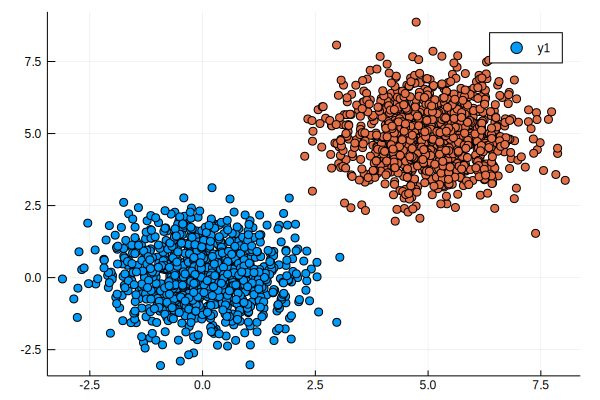

In [67]:
scatter(X[:,1], X[:,2], markercolor = labels)

In [68]:
rep, centroids = create_representativeClassifier(X, labels)

(getfield(Main, Symbol("##13#16")){Array{Float64,2},getfield(Main, Symbol("#get_label#14"))}([0.00125955 0.0828866; 5.05396 4.92362], getfield(Main, Symbol("#get_label#14"))()), [0.00125955 0.0828866; 5.05396 4.92362])

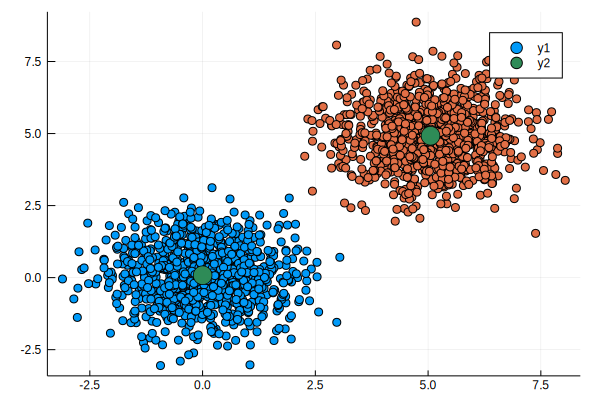

In [69]:
scatter(X[:,1], X[:,2], markercolor = labels)
scatter!(centroids[:,1], centroids[:,2], markersize = 10, markercolor = :seagreen)

Test data:

In [70]:
T = rand(Uniform(-3, 8), n,2);

In [71]:
labelsT = map(i -> rep(T[i,:]), 1:n);

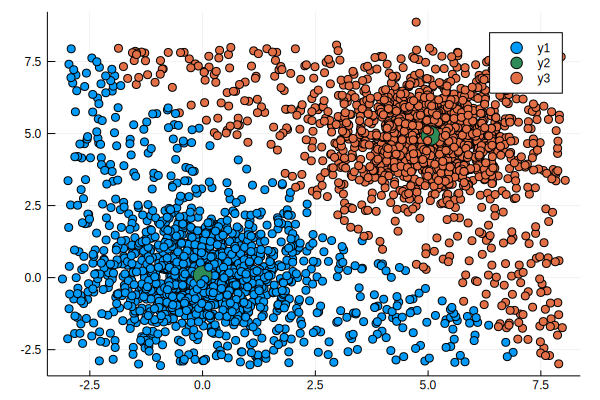

In [72]:
scatter(X[:,1], X[:,2], markercolor = labels)


scatter!(centroids[:,1], centroids[:,2], markersize = 10, markercolor = :seagreen)
scatter!(T[:,1], T[:,2] , markercolor = labelsT )